In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---
# **Loading Dataset**

In [3]:
df = pd.read_excel('AirQualityUCI.xlsx')
df.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.9,53.975000,0.750239


In [4]:
# Let's look moving average of the column `PT08.S2(NMHC)`

x = np.linspace(0, len(df), len(df))
y = df['PT08.S2(NMHC)']

---
# **Simple Moving Average**

In [20]:
def sma(y, window):
    n_samples = y.shape[0]

    y_sma = np.full(n_samples, np.nan)
    for idx in range(window, n_samples):
        y_sma[idx] = np.mean(y[idx-window: idx])

    return y_sma

# **Cummulative Moving Average**

In [21]:
def cma(y):
    y_cma = [y[0]]
    for idx in range(1, len(y)):
        y_cma.append(np.mean(y[:idx]))
    
    return y_cma

# **Weighted Moving Average**

In [31]:
def wma(y):
    n_samples = y.shape[0]
    # Giving (n-1)th point as weight n-1 and reducing that one by one on going back to 1-st point
    weights = np.arange(1, n_samples+1)
    
    y_wma = [y[0]]
    for idx in range(1,len(y)):
        y_wma.append(np.average(y[:idx], weights=weights[:idx]))
    
    return y_wma

    

# **Exponential Moving Average**

In [23]:
def ema(y, alpha):
    y_ema = [y[0]]

    for idx in range(1,len(y)):
        y_ema.append(alpha*y[idx-1]+(1-alpha)*y_ema[-1])
    
    return y_ema

---
# **Curve Plotting**

In [34]:
def plot_moving_average_curve(method, x, y):
    if method['name'] == 'SMA':
        y_sma = sma(y, method['window_size'])
        plt.plot(x, y, linewidth = 0.2)
        plt.plot(x, y_sma)
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.title(f'Simple Moving Average | Window Size: {method["window_size"]}')
        plt.show()
    elif method['name'] == 'CMA':
        y_cma = cma(y)
        plt.plot(x, y, linewidth = 0.2)
        plt.plot(x, y_cma)
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.title(f'Cummulative Moving Average')
        plt.show()
    elif method['name'] == 'WMA':
        y_wma = wma(y)
        plt.plot(x, y, linewidth = 0.2)
        plt.plot(x, y_wma)
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.title(f'Weighted Moving Average')
        plt.show()
    elif method['name'] == 'EMA':
        y_ema = ema(y, method['alpha'])
        plt.plot(x, y, linewidth = 0.2)
        plt.plot(x, y_ema)
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.title(f'Exponential Moving Average | Alpha: {method["alpha"]}')
        plt.show()


---
# **Code Usage**

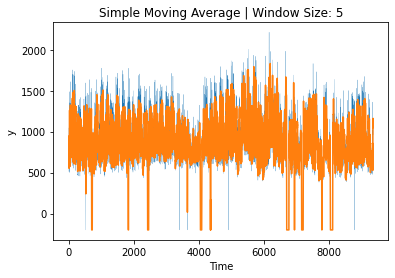

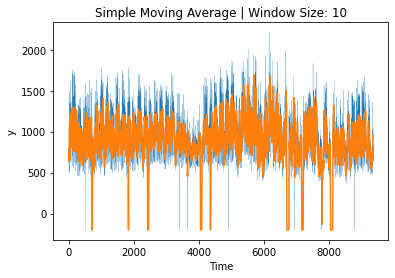

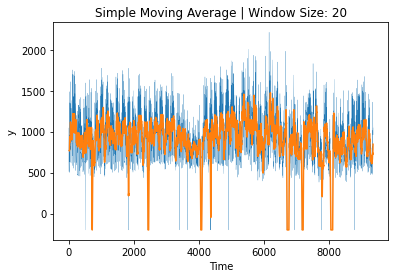

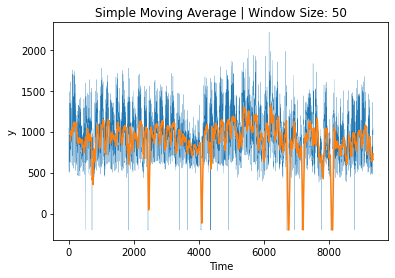

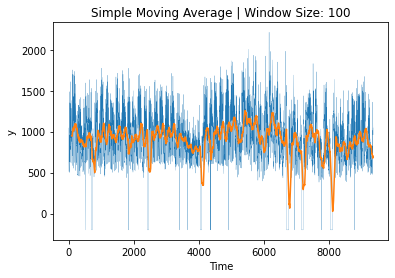

In [25]:
# Simple Moving Average for different window size

for window_size in [5, 10, 20, 50, 100]:
    plot_moving_average_curve({'name': 'SMA', 'window_size': window_size}, x, y)

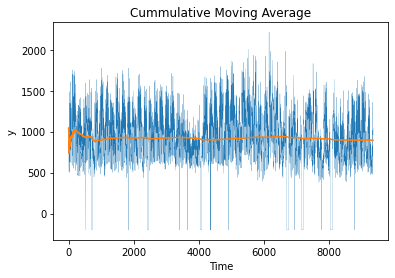

In [26]:
# Cummulative Moving Average

plot_moving_average_curve({'name': 'CMA'}, x, y)

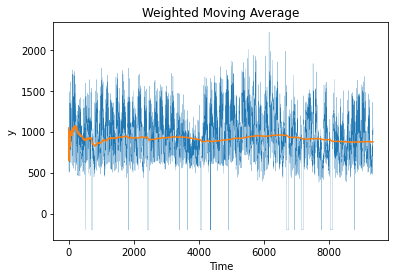

In [32]:
# Weighted Moving Average

plot_moving_average_curve({'name': 'WMA'}, x, y)

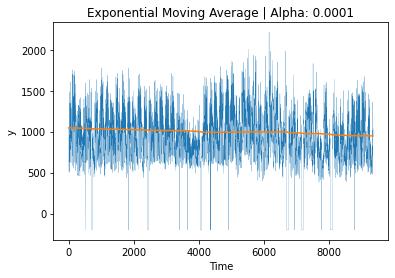

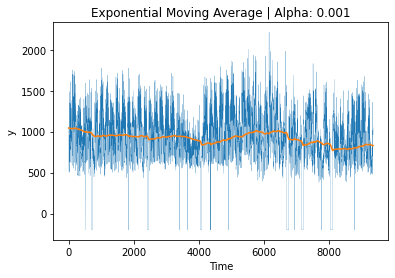

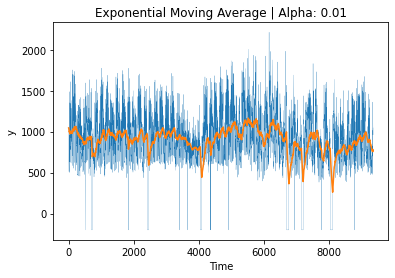

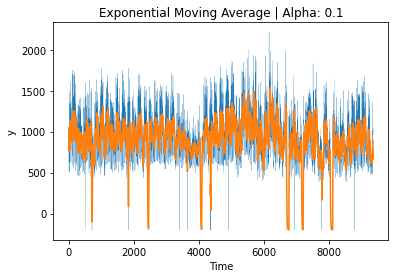

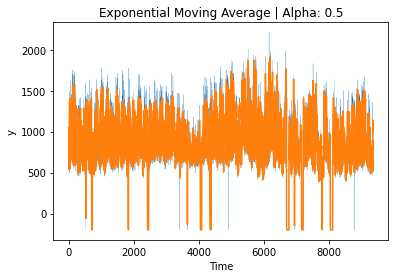

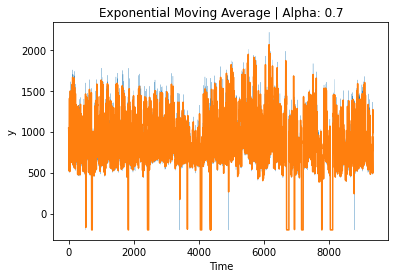

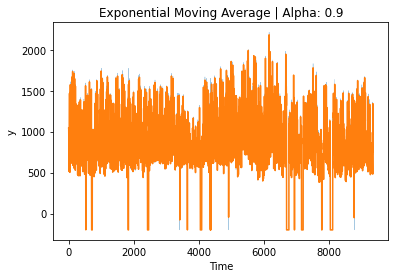

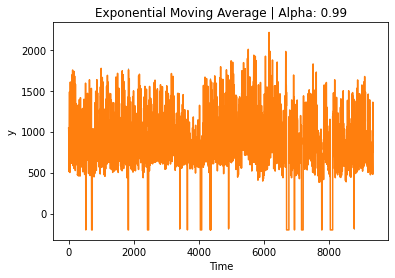

In [35]:
# Exponential Moving Average for different alpha

for alpha in [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 0.99]:
    plot_moving_average_curve({'name': 'EMA', 'alpha': alpha}, x, y)

Increasing alpha almost fits the data perfectly!